# Метод k ближайших соседей

### Сформируем данные

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def generateRandomCluster( xCenter, yCenter, pointsInCluster, sigma, clusterNumber ):
    """
    Функция формирует набор случайных pointsInCluster точек вокруг центра xCenter, yCenter со стандартным отклонением sigma.
    Для удобства сразу приписываем номер кластера clusterNumber
    
    Пример
    generateRandomCluster( 50, 50, 5, 1, 1 )
    
    [ (49.4383741073746, 50.759631072447775, 1),
     (50.382663637239496, 51.958511415275346, 1),
     (51.35861614413671, 50.14508008851586, 1),
     (49.99654565817289, 48.868625830102836, 1),
     (48.90429842105296, 50.30684883451077, 1) ]
    """
    
    clusterData = []
    for point in range( pointsInCluster ):
        clusterData.append( ( random.gauss( xCenter, sigma ), random.gauss( yCenter, sigma ), clusterNumber ) )
    
    return clusterData

In [3]:
def generateNClusters( clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma ):
    """
    Функция генерит clustersNumber кластеров в пределах (x, y) координат от minCoordinate до minCoordinate + maxLength
    
    Пример
    generateNClusters( 3, 0, 100, 5, 1 )
    
    [
        [ (30.101595428493244, 97.81846577317793, 0),
          (30.982265309141784, 94.85561016707207, 0),
          (29.324361801401345, 96.13225349356063, 0),
          (28.55314432177591, 97.71789084567285, 0),
          (30.925804186398505, 97.73651238892455, 0)],
        [ (35.42172429469604, 62.868371107151994, 1),
          (36.36575870693403, 60.81612414265114, 1),
          (36.3958015730347, 60.845554677754464, 1),
          (35.29157575130411, 63.179905869433654, 1),
          (38.19703749175945, 61.839734328145795, 1)],
        [ (92.22845587073014, 40.18055397530009, 2),
          (90.7642755825596, 40.68519067128221, 2),
          (92.27913966714033, 39.604710170714505, 2),
          (93.57420210013105, 40.20564381974239, 2),
          (92.33724850339567, 40.261922276131735, 2)]
    ]
    """
    
    clustersData = []
    for cluster in range( clustersNumber ):
        clustersData.append( generateRandomCluster( minCoordinate + maxLength * random.random(), 
                                                    minCoordinate + maxLength * random.random(),
                                                    pointsInCluster,
                                                    sigma, cluster) )
    
    return clustersData

In [4]:
def drawClusters( clustersData ):
    """
    Функция рисует набор кластеров по данным clustersData
    """
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append( point[0] )
            yData.append( point[1] )
            colors.append( point[2] )
    
        plt.scatter( xData, yData, label = colors[0] )
        
    plt.legend( loc='upper right' )
    plt.show()

In [5]:
clustersNumber = 3
minCoordinate = 0
maxLength = 100
pointsInCluster = 15
sigma = 5

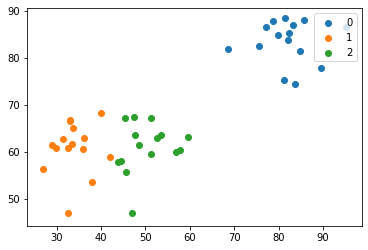

In [6]:
data = generateNClusters( clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma )
drawClusters( data )

### Строим модель

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = KNeighborsClassifier( n_neighbors = 3 )

In [9]:
X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append( [ point[0], point[1] ] )
        Y.append( point[2] )

In [10]:
# model.fit( X, Y )

In [11]:
def KNeighbors( clustersData, model ):
    """
    Визуализация результатов классификации
    """
    step = 1
    xx, yy = np.meshgrid( np.arange( minCoordinate, minCoordinate + maxLength, step ),
                          np.arange( minCoordinate, minCoordinate + maxLength, step ) )
    
    Z = model.predict( np.c_[ xx.ravel(), yy.ravel() ] )
    Z = Z.reshape( xx.shape )
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
    
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        
        for point in cluster:
            xData.append( point[0] )
            yData.append( point[1] )
            colors.append( point[2] )
    
        plt.scatter( xData, yData, label = colors[0] )
        
    plt.legend( loc='upper right' )
    
    plt.show()

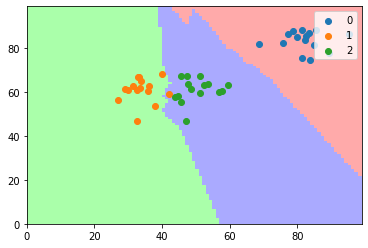

In [12]:
#data = generateNClusters( clustersNumber, minCoordinate, maxLength, pointsInCluster, sigma )

X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append( [ point[0], point[1] ] )
        Y.append( point[2] )

model.fit( X, Y )

KNeighbors( data, model )